Opinion dynamicalmodel in case of simple conflict dynamical system with attraction 
$p_i = \frac{1}{z} (p_i + p_i * r_i)$

In [11]:
import numpy as np
from sklearn.preprocessing import normalize
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import copy
import random
num_elem = 3 #number of opinions

In [38]:
#Random initialization of the agent's opinion
def rand_ini(num_elem):
    p_ = np.random.rand(num_elem).reshape(1,-1).astype(np.float64)
    #p_ = np.random.rand(num_elem).reshape(1,-1).astype(np.float64)*0.55 + 0.45
    #eps = np.random.uniform(0.01,0.015)
    #p_ = np.array([0.17-eps, 0.33+eps*0.25, 0.5+eps*0.75]).reshape(1,-1).astype(np.float64)
    #p_[0, np.random.choice(range(num_elem))] = 0.01
    p = normalize(p_, norm='l1')
    return p

#Setting the rule for interaction of two agents
def conflict(p,r):
    p_ = np.add(p, np.multiply(p,r))
    return normalize(p_, norm='l1')  

#Iterating over the agents' set
def iterations(number, H, nodes, agents_set):
    agents_temp = {}
    for i in range(number):
        for node in nodes:
            neighbor = np.random.choice(H.neighbors(node))
            agents_temp[node] = conflict(agents_set[node], agents_set[neighbor])
        agents_set = copy.deepcopy(agents_temp)
    return agents_temp

#Calculating average opinion of the agent 'node'
def av_neighbor_op(G, node, agents_set):
    s = np.zeros(num_elem)
    neighborhood = G.neighbors(node)
    for neighbor in neighborhood:
        for agent in agents_set:
            if neighbor == agent:
                s = np.add(s,agents_set[agent])
    return s / len(neighborhood)

#Aplying Mean-Field approximation to the opinion formation process
def mean_field_iterations(number, H, nodes, agents_set):
    neighbors_opinion = {}
    agents_temp = {}
    for i in range(number):
        for node in nodes:
            neighbors_opinion[node] = av_neighbor_op(H, node, agents_set)        
        for node in nodes:
            agents_temp[node] = conflict(agents_set[node], neighbors_opinion[node])
        agents_set = copy.deepcopy(agents_temp)
    return agents_temp    

In [42]:
num_agents = 20
G=nx.complete_graph(num_agents)
nodes = G.nodes()
# initializing a set of agents with randomly set opinions
#degrees = H.degree(nodes)
agents = {}
for node in nodes:
    agents[node] = rand_ini(num_elem)

#agents[nodes[0]] = np.array([1, 0, 0])

agents_check = {}
agents_check = copy.deepcopy(agents)


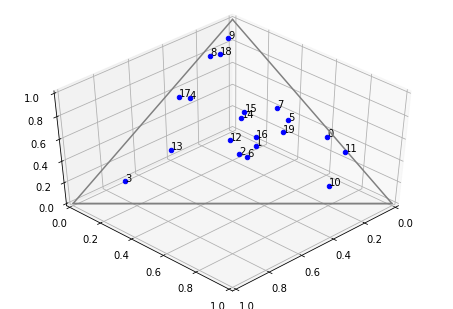

In [43]:
#a_set = mean_field_iterations(30, G, nodes, a_set)
a_set = iterations(1, G, nodes, agents)
X = []
Y = []
Z = []
X1 = []
Y1 = []
Z1 = []
for agent in a_set:
    X.append(a_set[agent][0,0])    
    Y.append(a_set[agent][0,1])    
    Z.append(a_set[agent][0,2])
    
fig = plt.figure()
ax = Axes3D(fig)
ax.view_init(45, 45)
e1 = [0, 0, 1]
e2 = [0, 1, 0]
e3 = [1, 0, 0]
ax.plot(e1, e2, e3, color='gray')
ax.plot(e2, e3, e1, color='gray')
ax.set_xlim3d(0, 1.0)
ax.set_ylim3d(0,1.0)
ax.set_zlim3d(0,1.0)
#ax.scatter(X, Y, Z, c='b')
#ax.scatter(X1, Y1, Z1, c='r')
for i in range(len(X)): #plot each point + it's index as text above
    ax.scatter(X[i],Y[i],Z[i],color='b') 
    ax.text(X[i],Y[i],Z[i],  '%s' % (str(i)), size=10, zorder=1, color='k') 
for i in range(len(X1)): #plot each point + it's index as text above
    ax.scatter(X1[i],Y1[i],Z1[i],color='r') 
    ax.text(X1[i],Y1[i],Z1[i],  '%s' % (str(i)), size=10, zorder=1, color='k') 
plt.show()

In [ ]:
#counting instances which converges to one of the stady states of the system 
result = np.zeros(3)
for k in range(10):
    agents = {}
    for node in nodes:
        agents[node] = rand_ini(num_elem, shift)
    agents[0] = np.array([1, 0, 0])
    for i in range(10):
        a_set = copy.deepcopy(agents)
        a_set = iterations(30, G, nodes, a_set)
        s = np.zeros((1,3))
        for ag in a_set:
            s += a_set[ag]
        ind = np.argmax(s)
        result[ind] += 1
    
print(result)